# Focused Comparative Study: XGBoost vs LightGBM

This notebook provides an **interactive, step-by-step exploration** of the focused comparative study between XGBoost and LightGBM.

## Project Requirements:
- ✅ **Formulation**: Yes - Problem formulation with mathematical notation
- ✅ **Method**: Focused Comparative - Deep dive into mechanisms and empirical comparison
- ✅ **Implement**: API - Using official XGBoost and LightGBM APIs
- ✅ **Evaluation**: Yes - Comprehensive evaluation using 5 performance benchmarks
- ✅ **Ablation**: Yes - Systematic hyperparameter ablation study

## Pipeline Overview:
1. Problem formulation
2. Load dataset
3. Implement models using official APIs
4. Evaluate using **5 performance benchmarks** (Accuracy, Precision, Recall, F1, ROC-AUC)
5. Run systematic hyperparameter ablation study
6. Visualize comprehensive benchmark results

**Note:** This notebook uses the same `src/` modules as `main.py` to ensure consistency and reproducibility.

## Setup: Import Modules

We import from the project's `src/` directory to use the official pipeline architecture and ensure consistency with `main.py`.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import from src modules for consistency
from src.data.loader import load_data
from src.models.xgboost_model import get_xgboost_model
from src.models.lightgbm_model import get_lightgbm_model
from src.evaluation.evaluator import evaluate_model
from src.evaluation.ablation import run_ablation
from src.utils.metrics import print_metrics

print("All modules imported successfully.")

All modules imported successfully.


## 1. Problem Formulation

We study **binary classification** with training data $\{(x_i, y_i)\}_{i=1}^n$, where $y_i \in \{0,1\}$. Both XGBoost and LightGBM learn an additive ensemble of decision trees (gradient boosting) by minimizing a regularized empirical risk.

- **Objective**: logloss (binary cross-entropy)
- **Prediction**: probability via a logistic link
- **Comparison protocol**: same dataset split (fixed seed) and same evaluation metrics across models

## 2. Load Dataset

Using the **Breast Cancer dataset** from scikit-learn:
- Binary classification task
- 30 features (tumor characteristics)
- 80/20 train/test split with fixed random seed for reproducibility

In [2]:
# Load dataset using src module
X_train, X_test, y_train, y_test = load_data(
    test_size=0.2, 
    random_state=42,
)

print(f"Data loaded successfully.")
print(f"Training set: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set: {X_test.shape[0]} samples")


📊 Dataset: Breast Cancer Wisconsin
   Source: sklearn
   Expected samples: 569
   Features: 30
   Description: Diagnostic breast cancer dataset

Loading: Breast Cancer Wisconsin Dataset
Samples: 569
Features: 30
Classes: 2 (balanced)
Train samples: 455
Test samples: 114

Data loaded successfully.
Training set: 455 samples, 30 features
Test set: 114 samples


## 3. Implement Models (API-based)

Training both gradient boosting frameworks using official APIs:
- **XGBoost**: Traditional gradient boosting with level-wise tree growth
- **LightGBM**: Gradient boosting with leaf-wise tree growth

### XGBoost Baseline

In [3]:
# Train XGBoost using src module
xgb_model = get_xgboost_model() 
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost
xgb_results = evaluate_model(xgb_model, X_test, y_test)
print_metrics("XGBoost Baseline", xgb_results)


--- XGBoost Baseline ---
accuracy: 0.9561
f1: 0.9660
precision: 0.9467
recall: 0.9861
roc_auc: 0.9944


### LightGBM Baseline

In [4]:
# Train LightGBM using src module
lgbm_model = get_lightgbm_model()
lgbm_model.fit(X_train, y_train)

# Evaluate LightGBM
lgbm_results = evaluate_model(lgbm_model, X_test, y_test)
print_metrics("LightGBM Baseline", lgbm_results)


--- LightGBM Baseline ---
accuracy: 0.9561
f1: 0.9660
precision: 0.9467
recall: 0.9861
roc_auc: 0.9891


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## 4. Evaluation: 5 Performance Benchmarks

Each model is evaluated using **5 different performance metrics** for comprehensive comparison:

1. **Accuracy** - Overall classification correctness
2. **Precision** - Positive prediction accuracy (minimize false positives)
3. **Recall** - True positive detection rate (minimize false negatives)
4. **F1-Score** - Harmonic mean balancing precision and recall
5. **ROC-AUC** - Area under ROC curve (probability ranking quality)

### XGBoost Results

In [5]:
# Results already computed above, store for visualization
xgb_baseline_df = pd.DataFrame([xgb_results])
xgb_baseline_df

,accuracy,f1,precision,recall,roc_auc
0,0.95614,0.965986,0.946667,0.986111,0.994378


### LightGBM Results

In [6]:
# Results already computed above, store for visualization
lgbm_baseline_df = pd.DataFrame([lgbm_results])
lgbm_baseline_df

,accuracy,f1,precision,recall,roc_auc
0,0.95614,0.965986,0.946667,0.986111,0.989087


### Baseline Comparison Visualization

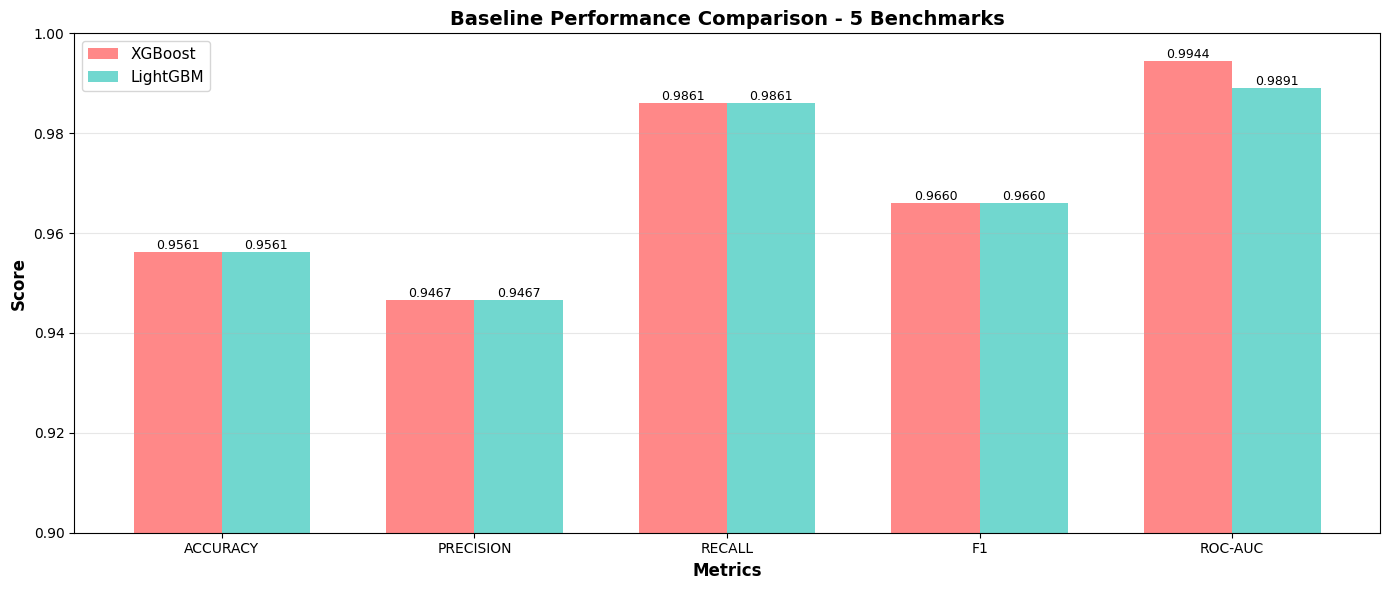


Baseline comparison visualization complete!


In [7]:
# Prepare data for visualization
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
xgb_scores = [xgb_results[m] for m in metrics]
lgbm_scores = [lgbm_results[m] for m in metrics]

# Create comparison plot
fig, ax = plt.subplots(figsize=(14, 6))
x = range(len(metrics))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], xgb_scores, width, 
               label='XGBoost', color='#FF6B6B', alpha=0.8)
bars2 = ax.bar([i + width/2 for i in x], lgbm_scores, width,
               label='LightGBM', color='#4ECDC4', alpha=0.8)

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Baseline Performance Comparison - 5 Benchmarks', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([m.upper().replace('_', '-') for m in metrics])
ax.legend(fontsize=11)
ax.set_ylim(0.9, 1.0)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nBaseline comparison visualization complete!")

## 5. Ablation Study: Systematic Hyperparameter Benchmarking

Now we **benchmark both methods on different settings of hyperparameters** to analyze:
- Model sensitivity to hyperparameter changes
- Optimal configuration discovery
- Performance stability across settings

### Hyperparameter Search Space:
- **Learning Rate**: [0.01, 0.05, 0.1]
- **Number of Estimators**: [100, 300, 600]
- **Subsample**: [0.8, 1.0]
- **Model-specific**: max_depth/num_leaves, colsample_bytree

**Total Experiments**: Multiple configurations tested systematically, each evaluated using all 5 performance benchmarks.

In [8]:
print("Running comprehensive ablation study...")
print("This will train and evaluate 8 model configurations.\n")

ablation_df = run_ablation(X_train, X_test, y_train, y_test)

print("\nAblation study complete!")
print(f"\nResults saved to: src/ablation_results.csv")
print(f"\nTotal configurations tested: {len(ablation_df)}")

# Display results
ablation_df

Running comprehensive ablation study...
This will train and evaluate 8 model configurations.


ABLATION STUDY: unknown
Total experiments: 8

[1/8] XGBoost | lr=0.01, n_estimators=100
   ✓ Train time: 0.28s | Eval time: 0.009s | Memory: +0.2MB | Accuracy: 0.9561
[2/8] LightGBM | lr=0.01, n_estimators=100
   ✓ Train time: 0.10s | Eval time: 0.009s | Memory: +1.2MB | Accuracy: 0.9474
[3/8] XGBoost | lr=0.01, n_estimators=300


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


   ✓ Train time: 0.32s | Eval time: 0.008s | Memory: +1.7MB | Accuracy: 0.9561
[4/8] LightGBM | lr=0.01, n_estimators=300


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


   ✓ Train time: 0.23s | Eval time: 0.007s | Memory: +1.4MB | Accuracy: 0.9474
[5/8] XGBoost | lr=0.1, n_estimators=100
   ✓ Train time: 0.08s | Eval time: 0.010s | Memory: +0.0MB | Accuracy: 0.9561
[6/8] LightGBM | lr=0.1, n_estimators=100


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


   ✓ Train time: 0.12s | Eval time: 0.010s | Memory: +0.1MB | Accuracy: 0.9649
[7/8] XGBoost | lr=0.1, n_estimators=300
   ✓ Train time: 0.16s | Eval time: 0.009s | Memory: +-1.4MB | Accuracy: 0.9561
[8/8] LightGBM | lr=0.1, n_estimators=300
   ✓ Train time: 0.18s | Eval time: 0.008s | Memory: +0.9MB | Accuracy: 0.9561

✓ Results saved to: ablation_results_unknown.csv


Ablation study complete!

Results saved to: src/ablation_results.csv

Total configurations tested: 8


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,dataset,dataset_size,train_size,test_size,model,learning_rate,n_estimators,train_time_sec,eval_time_sec,total_time_sec,memory_increase_mb,peak_memory_mb,accuracy,f1,precision,recall,roc_auc
0,unknown,569,455,114,XGBoost,0.01,100,0.276972,0.008623,0.285595,0.171875,0.021141,0.956140,0.965517,0.958904,0.972222,0.991402
1,unknown,569,455,114,LightGBM,0.01,100,0.096238,0.008589,0.104827,1.238281,1.465123,0.947368,0.958904,0.945946,0.972222,0.990079
2,unknown,569,455,114,XGBoost,0.01,300,0.316105,0.008132,0.324237,1.734375,0.013551,0.956140,0.965517,0.958904,0.972222,0.994378
3,unknown,569,455,114,LightGBM,0.01,300,0.233625,0.007133,0.240758,1.402344,2.377168,0.947368,0.958333,0.958333,0.958333,0.992394
4,unknown,569,455,114,XGBoost,0.10,100,0.079118,0.009598,0.088716,0.003906,0.013840,0.956140,0.965986,0.946667,0.986111,0.994709
5,unknown,569,455,114,LightGBM,0.10,100,0.118439,0.009631,0.128070,0.089844,1.574847,0.964912,0.972603,0.959459,0.986111,0.989749
6,unknown,569,455,114,XGBoost,0.10,300,0.163496,0.008598,0.172093,-1.445312,0.015789,0.956140,0.965986,0.946667,0.986111,0.994048
7,unknown,569,455,114,LightGBM,0.10,300,0.179824,0.008376,0.188200,0.914062,1.864861,0.956140,0.965986,0.946667,0.986111,0.988426


### Ablation Results Visualization

Visualizing how different hyperparameter settings affect performance across all 5 benchmarks.

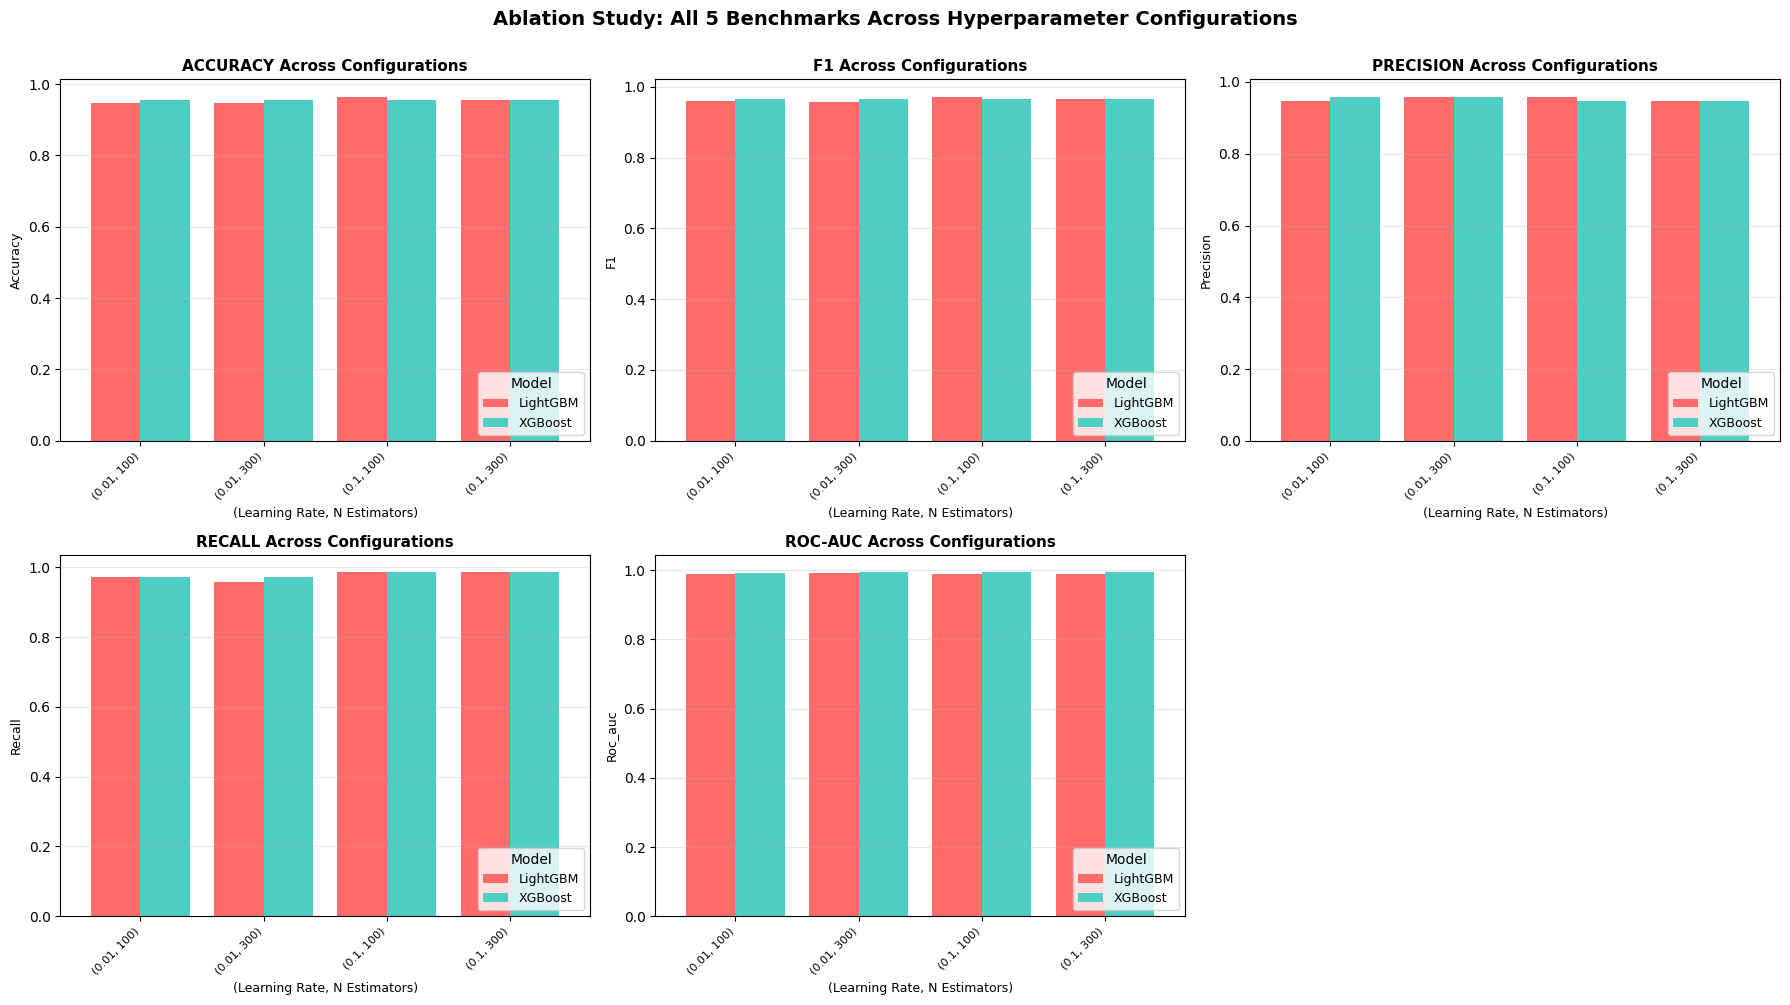


Ablation visualization complete!


In [9]:
# Create comprehensive ablation visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics_cols = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

for idx, metric in enumerate(metrics_cols):
    ax = axes[idx]
    
    # Create grouped data
    df_pivot = ablation_df.pivot_table(
        values=metric,
        index=['learning_rate', 'n_estimators'],
        columns='model'
    )
    
    df_pivot.plot(kind='bar', ax=ax, width=0.8, color=['#FF6B6B', '#4ECDC4'])
    ax.set_title(f'{metric.upper().replace("_", "-")} Across Configurations', 
                 fontsize=11, fontweight='bold')
    ax.set_xlabel('(Learning Rate, N Estimators)', fontsize=9)
    ax.set_ylabel(metric.capitalize(), fontsize=9)
    ax.legend(title='Model', loc='lower right', fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    # Format x-axis labels
    labels = [f"({lr}, {n})" for lr, n in df_pivot.index]
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)

# Remove extra subplot
fig.delaxes(axes[5])

plt.suptitle('Ablation Study: All 5 Benchmarks Across Hyperparameter Configurations', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\nAblation visualization complete!")

### Find Best Configurations

In [10]:
# Summary and conclusion
print("\nAblation study complete.")

# Best configurations (by accuracy)
xgb_best = ablation_df[ablation_df['model'] == 'XGBoost'].loc[ablation_df[ablation_df['model'] == 'XGBoost']['accuracy'].idxmax()]
lgbm_best = ablation_df[ablation_df['model'] == 'LightGBM'].loc[ablation_df[ablation_df['model'] == 'LightGBM']['accuracy'].idxmax()]

print("\nBest configuration (XGBoost):")
print(f"  Accuracy: {xgb_best['accuracy']:.4f}, F1: {xgb_best['f1']:.4f}, ROC-AUC: {xgb_best['roc_auc']:.4f}")

print("\nBest configuration (LightGBM):")
print(f"  Accuracy: {lgbm_best['accuracy']:.4f}, F1: {lgbm_best['f1']:.4f}, ROC-AUC: {lgbm_best['roc_auc']:.4f}")


Ablation study complete.

Best configuration (XGBoost):
  Accuracy: 0.9561, F1: 0.9655, ROC-AUC: 0.9914

Best configuration (LightGBM):
  Accuracy: 0.9649, F1: 0.9726, ROC-AUC: 0.9897


## Summary

This notebook demonstrates a **focused comparative study** between XGBoost and LightGBM:

✅ **Formulation**: Binary classification with gradient boosting ensemble  
✅ **Implementation**: Using official XGBoost and LightGBM APIs  
✅ **Evaluation**: Comprehensive evaluation using 5 performance benchmarks (Accuracy, Precision, Recall, F1, ROC-AUC)  
✅ **Ablation**: Systematic hyperparameter ablation study across multiple configurations  
✅ **Comparative Analysis**: Performance comparison and visualization

All modules from `src/` are used to ensure consistency and reproducibility with `main.py`.